In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [16]:
# Generating data
X, _ = make_blobs(n_samples=300, centers=3, random_state=0)

# Create and configure the CURE model (AgglomerativeClustering)
cure = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')


In [17]:
df=pd.DataFrame(X)
df.columns=["col 1","col 2"]

In [18]:
df

,col 1,col 2
0,0.063448,5.420804
1,1.329670,-0.485700
2,1.737308,4.425462
3,-1.612835,3.112175
4,-1.746445,1.833846
...,...,...
295,-0.637628,4.091047
296,-0.426620,4.215904
297,1.367430,-0.316414
298,0.231515,3.477349


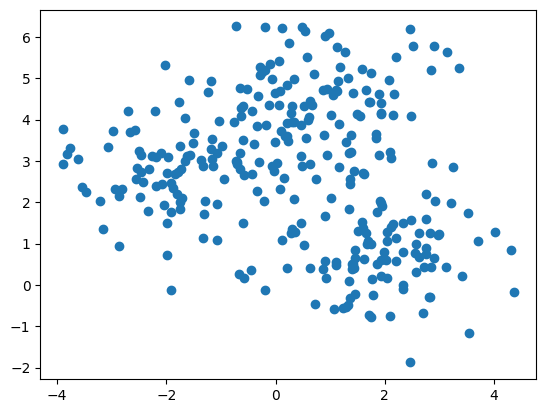

In [19]:
plt.scatter(df['col 1'],df['col 2'])

In [20]:
# Fit the model to the data
cure.fit(df)



C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [21]:
# Retrieve cluster labels
cluster_labels = cure.labels_

df["label"]= cluster_labels


In [22]:
df

,col 1,col 2,label
0,0.063448,5.420804,2
1,1.329670,-0.485700,1
2,1.737308,4.425462,2
3,-1.612835,3.112175,2
4,-1.746445,1.833846,0
...,...,...,...
295,-0.637628,4.091047,2
296,-0.426620,4.215904,2
297,1.367430,-0.316414,1
298,0.231515,3.477349,2


In [23]:
# dividing clusters
c1=df[df["label"]==0]
c2=df[df["label"]==1]
c3=df[df["label"]==2]


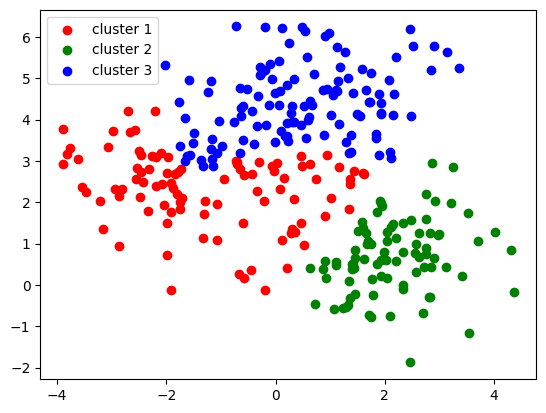

In [24]:
plt.scatter(c1['col 1'],c1['col 2'],c="red",label="cluster 1")
plt.scatter(c2['col 1'],c2['col 2'],c="green",label="cluster 2")
plt.scatter(c3['col 1'],c3['col 2'],c="blue",label="cluster 3")
plt.legend()
plt.show()

In [25]:
# adding a new point :
data=[-2.204930,1.215728]
km=KMeans(n_clusters=3,random_state=0)
km


KMeans(n_clusters=3, random_state=0)

In [26]:
km.fit(df[["col 1","col 2"]])

C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [27]:
km.predict([data])

C:\Users\abdul saboor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

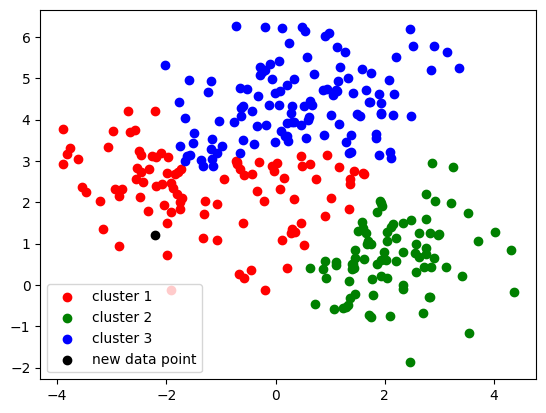

In [28]:
# new data points :
plt.scatter(c1['col 1'],c1['col 2'],c="red",label="cluster 1")
plt.scatter(c2['col 1'],c2['col 2'],c="green",label="cluster 2")
plt.scatter(c3['col 1'],c3['col 2'],c="blue",label="cluster 3")
plt.scatter(data[0],data[1],c="black",label="new data point")

plt.legend()
plt.show()